### Import libraries

In [6]:
import os
import sys
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
#import xlsxwriter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [8]:
df=pd.read_csv('table_moneyspot_features.csv')

###query from BQ
# SELECT * FROM `data-team-318806.books_db.preprocessed_features` 
# where 1=1 
# and lower(display_name) like '%moneyspot%'
# and lower(display_name) like '%au%'
# and display_name not like '%test_10_docker_embedding%'

In [12]:
df.shape

(52506, 177)

In [16]:
df.head()

,customer_id,gender,first_name,last_name,origination_date,principal,fees_accountable,last_pay_date,last_pay_amt,total_payments,...,lifetime_total_interest,credit_agency_name,dishonour_fees,lifeime_total_fees,credit_number,loan_term,total_amt_overcharged,account_overcharge_type,total_unascertainable_fees,total_other_ascertainable_fees
0,NaN,F,Leshonta,Lyons,2024-04-17 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,F,Laura,Anderson,2024-02-27 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,M,Jake,Burke,2024-03-31 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,F,Kimberley,Broadbent,2024-02-15 00:00:00 UTC,NaN,NaN,2024-04-19 00:00:00 UTC,48.57,194.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,M,Jongeun,Bae,2023-12-29 00:00:00 UTC,NaN,NaN,2024-04-19 00:00:00 UTC,73.50,661.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.columns.tolist()

['customer_id',
 'gender',
 'first_name',
 'last_name',
 'origination_date',
 'principal',
 'fees_accountable',
 'last_pay_date',
 'last_pay_amt',
 'total_payments',
 'due_date',
 'current_balance',
 'address',
 'city',
 'state',
 'postcode',
 'dob',
 'phone',
 'email',
 'employment_status',
 'dpd',
 'ak_id',
 'book_id',
 'country',
 'book_name',
 'display_name',
 'type',
 'industry',
 'sub_sector',
 'dca_placement',
 'age',
 'model_pricing_balance',
 'payers',
 'last_pay_days',
 'email_provider',
 'phone_flag',
 'phone_val',
 'email_flag',
 'email_val',
 'median_mortgage_repay_monthly',
 'median_tot_hhd_inc_weekly',
 'paid_last_3_months',
 'paid_last_6_months',
 'paid_last_9_months',
 'paid_last_12_months',
 'product_name',
 'nationality',
 'cutoff_date',
 'interest',
 'fees_unaccountable',
 'total_paid_last_year',
 'full_time_employment_percent',
 'default_date',
 'origination_amt',
 'median_household_income_usd',
 'chargeoff_date',
 'chargeoff_balance',
 'phone_exists_in_db',
 'emai

In [18]:
###gender analysis

In [20]:
df['gender'].unique()

array(['F', 'M', 'Unknown', 'Prof.'], dtype=object)

In [30]:
relevant_book_names=df['display_name'].unique().tolist()

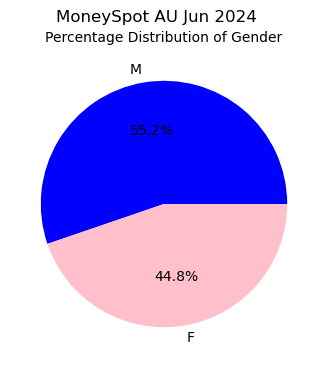

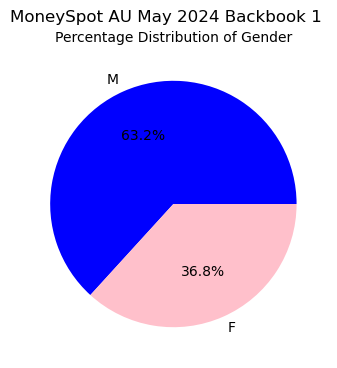

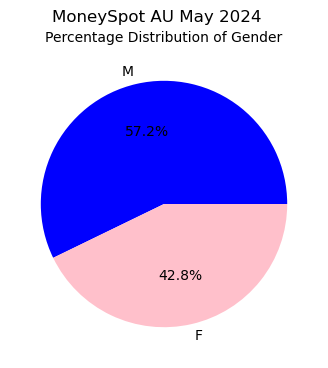

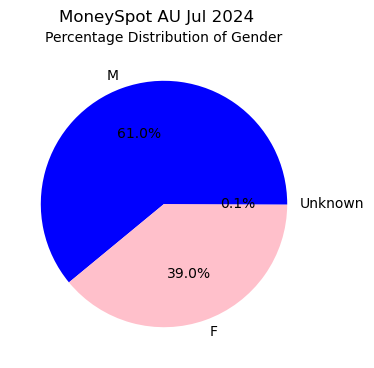

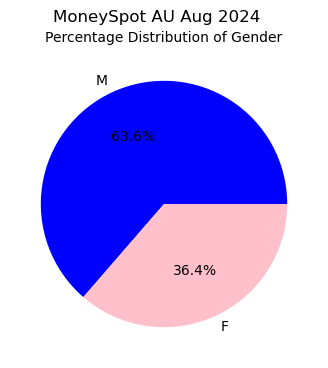

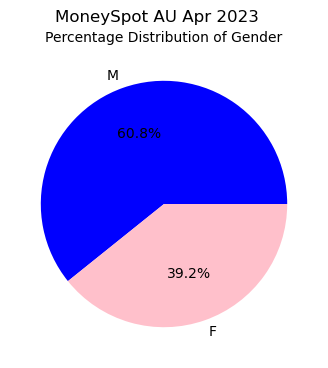

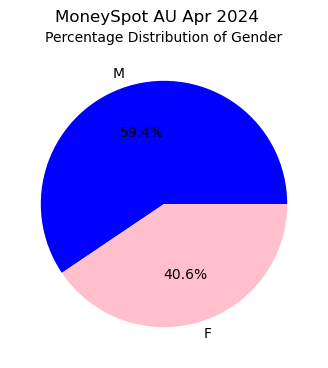

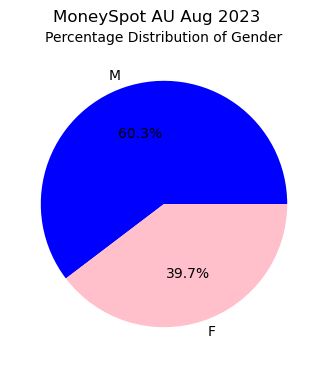

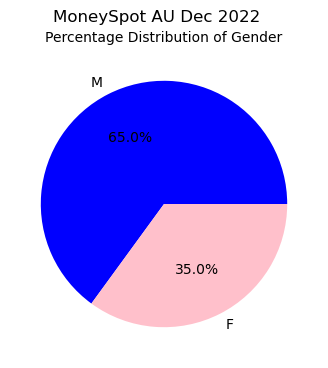

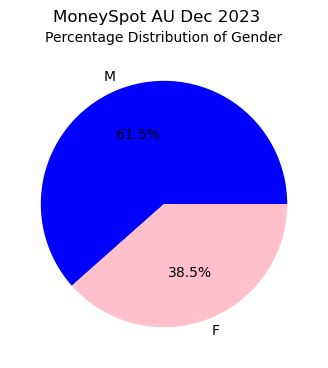

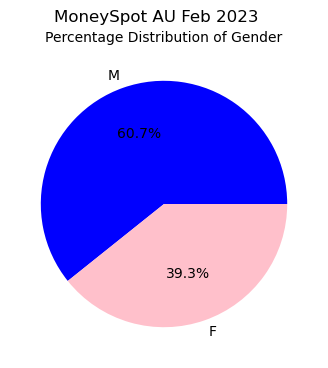

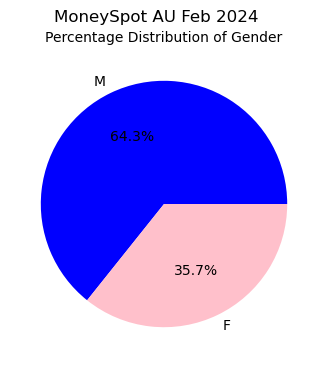

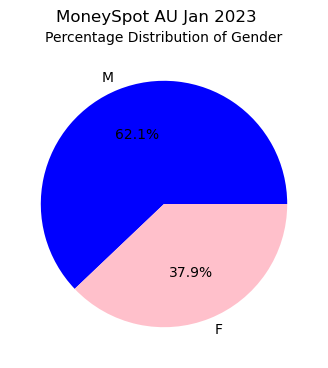

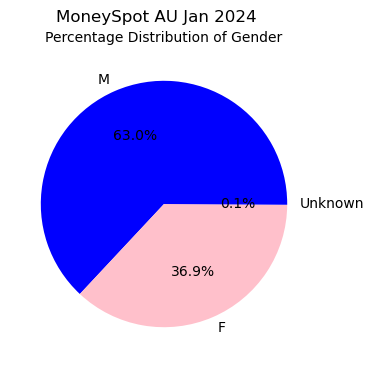

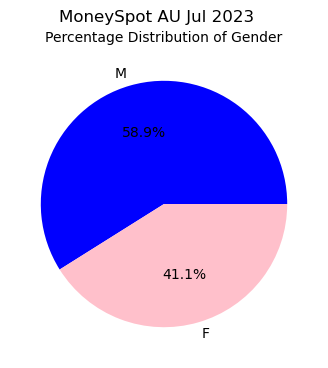

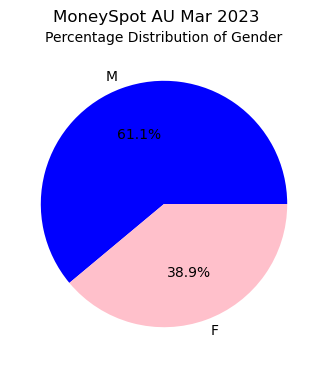

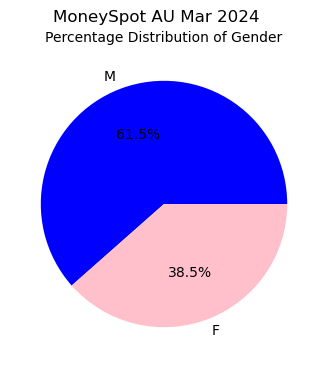

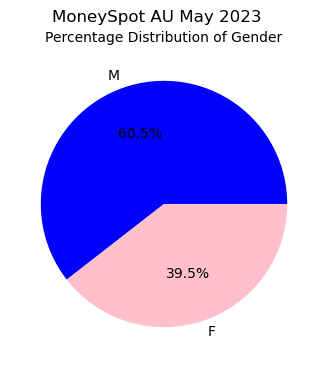

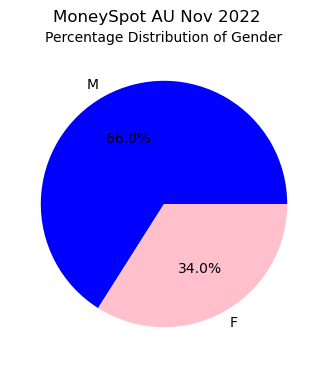

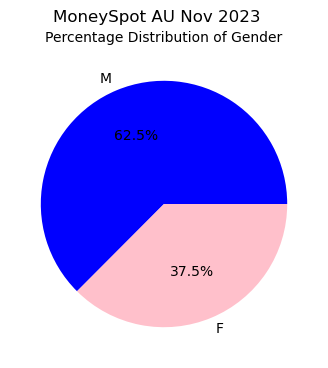

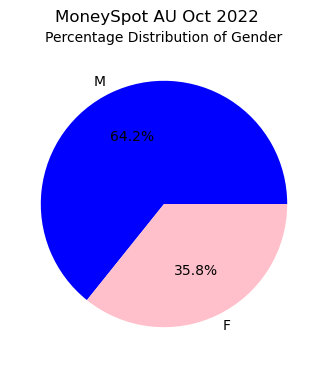

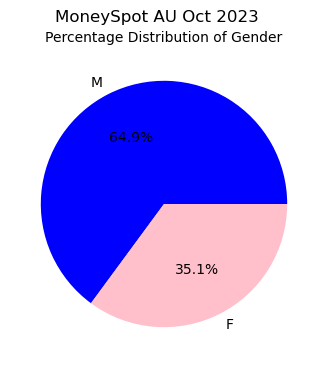

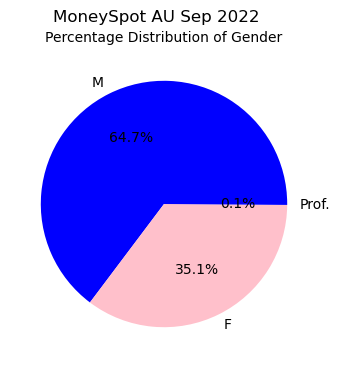

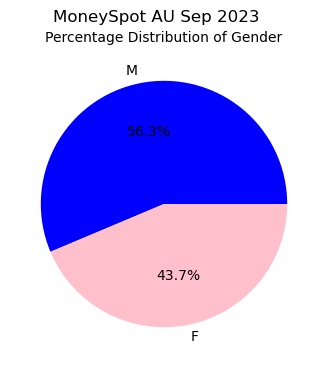

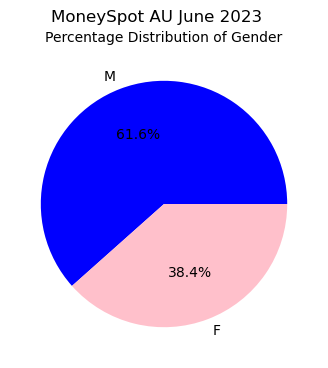

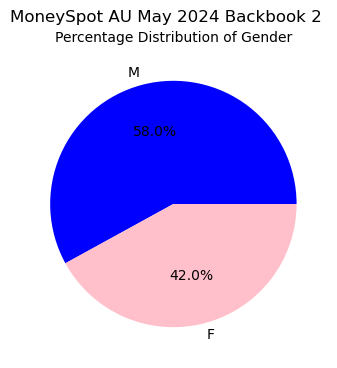

In [48]:
for book_name in relevant_book_names:
    df_gender=pd.DataFrame([])
    df_gender=df[(df['display_name']==book_name)].copy()
    gender_counts = df_gender['gender'].value_counts()
    gender_percentages = (gender_counts / gender_counts.sum()) * 100
    
    # Plotting the pie chart
    plt.figure(figsize=(6, 4))
    plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', colors=['blue', 'pink'])
    plt.title('Percentage Distribution of Gender', fontsize=10)
    plt.suptitle(book_name)   
    plt.show()